In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('train.csv')

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### so we can bin the age column here

## Fixed Intervals

In [14]:
data['AgeBin'] = pd.cut(data['Age'], bins=[0,12,18,35,60,80], labels=['Child','Young','Youth','Adult','Senior'])

In [15]:
data['AgeBin']

0      Youth
1      Adult
2      Youth
3      Youth
4      Youth
       ...  
886    Youth
887    Youth
888      NaN
889    Youth
890    Youth
Name: AgeBin, Length: 891, dtype: category
Categories (5, object): ['Child' < 'Young' < 'Youth' < 'Adult' < 'Senior']

<Axes: xlabel='AgeBin', ylabel='count'>

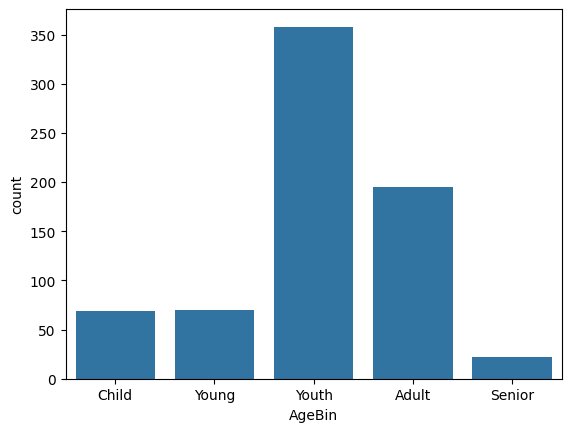

In [16]:
sns.countplot(x=data['AgeBin'])

## Quantile Based

In [19]:
data['AgeQuantile'] = pd.qcut(data['Age'], q=4, labels=['Q1','Q2','Q3','Q4'])

In [20]:
data['AgeQuantile']

0       Q2
1       Q3
2       Q2
3       Q3
4       Q3
      ... 
886     Q2
887     Q1
888    NaN
889     Q2
890     Q3
Name: AgeQuantile, Length: 891, dtype: category
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

<Axes: xlabel='AgeQuantile', ylabel='count'>

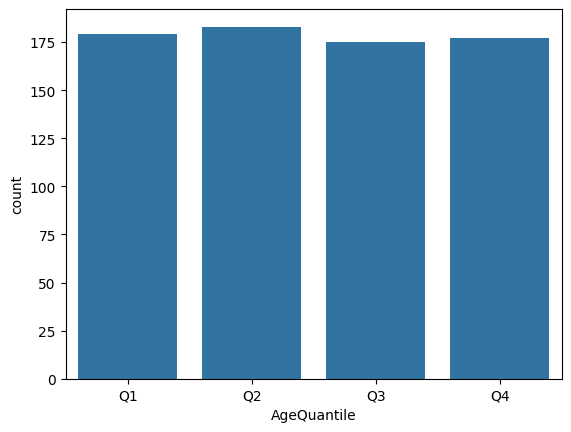

In [22]:
sns.countplot(x = data['AgeQuantile'])

## Custom lambda based

In [23]:
def age_bin(age):
    if pd.isnull(age):
        return 'Unknown'
    elif age<=12:
        return 'Child'
    elif age <= 18:
        return 'Teen'
    elif age <= 35:
        return 'YoungAdult'
    elif age <= 60:
        return 'Adult'
    else:
        return 'Senior'

data['AgeGroup'] = data['Age'].apply(age_bin)

In [24]:
data[['Age','AgeBin','AgeQuantile','AgeGroup']]

,Age,AgeBin,AgeQuantile,AgeGroup
0,22.0,Youth,Q2,YoungAdult
1,38.0,Adult,Q3,Adult
2,26.0,Youth,Q2,YoungAdult
3,35.0,Youth,Q3,YoungAdult
4,35.0,Youth,Q3,YoungAdult
...,...,...,...,...
886,27.0,Youth,Q2,YoungAdult
887,19.0,Youth,Q1,YoungAdult
888,NaN,NaN,NaN,Unknown
889,26.0,Youth,Q2,YoungAdult
